<a href="https://colab.research.google.com/github/mutwil/COPB2024/blob/main/GeneFunctions_FunctionalEvidenceOverTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How many papers describing gene function in plants are being published?

Downloads the current gene annotation data and installs biopython

In [1]:
# Step 1: Use wget to download the Arabidopsis thaliana Gene Ontology (GO) and GO Slim annotations file.
# This file is compressed (gz format), and we will store it with the name 'ATH_GO_GOSLIM.txt.gz'.
# The file is being fetched from the Arabidopsis Information Resource (TAIR).
!wget -O ATH_GO_GOSLIM.txt.gz "https://www.arabidopsis.org/api/download-files/download?filePath=GO_and_PO_Annotations/Gene_Ontology_Annotations/ATH_GO_GOSLIM.txt.gz"

# Step 2: Decompress the downloaded gzipped file.
# 'gzip -d' is used to decompress 'ATH_GO_GOSLIM.txt.gz', resulting in 'ATH_GO_GOSLIM.txt'.
!gzip -d ATH_GO_GOSLIM.txt.gz

# Step 3: Install the Biopython package.
# Biopython is a set of tools for biological computation, and this step installs the necessary package.
# It is useful for tasks such as parsing biological data files, performing sequence analyses, and more.
!pip install biopython

--2024-09-30 03:34:11--  https://www.arabidopsis.org/api/download-files/download?filePath=GO_and_PO_Annotations/Gene_Ontology_Annotations/ATH_GO_GOSLIM.txt.gz
Resolving www.arabidopsis.org (www.arabidopsis.org)... 76.223.67.159, 15.197.242.219
Connecting to www.arabidopsis.org (www.arabidopsis.org)|76.223.67.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘ATH_GO_GOSLIM.txt.gz’

ATH_GO_GOSLIM.txt.g     [     <=>            ]   7.08M  7.30MB/s    in 1.0s    

2024-09-30 03:34:13 (7.30 MB/s) - ‘ATH_GO_GOSLIM.txt.gz’ saved [7425690]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.9 MB/s eta 0:00:00


The code identified the experimentally verified genes by looking at Gene Ontology evidence codes ['EXP','IDA','IPI','IMP','IGI']

There are 29000 genes in the Arabidopsis:
11828 genes (40.786206896551725 percent) have at least one domain of their function described
3693 genes (12.734482758620691 percent) have all three functional domains characterized


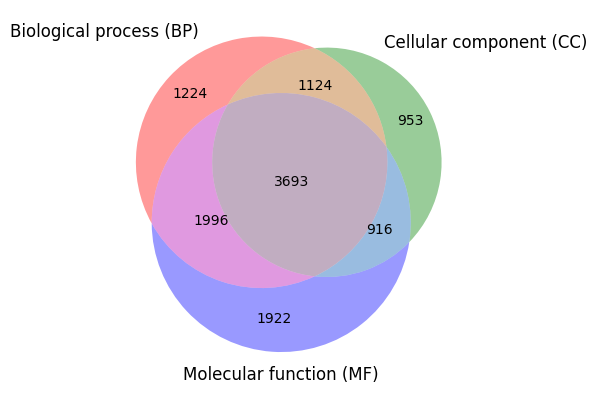

In [2]:
# Import necessary libraries for creating Venn diagrams and plotting
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Initialize empty lists to store gene data related to different gene ontology (GO) categories
biological_process, cellular_component, molecular_function = [],[],[]
biological_process_pubmedid, cellular_component_pubmedid, molecular_function_pubmedid = [],[],[]

# Define a list of experimental evidence codes (evidence supporting the gene ontology assignment)
experimental_evidence = ['EXP', 'IDA', 'IPI', 'IMP', 'IGI']

# Initialize an empty list to store all the genes
all_genes = []

# Lists to store publication dates of experimental results (currently not used, but prepared)
date_bp, date_mf, date_cc = [], [], []


# Open and iterate over each line in the downloaded Arabidopsis GO annotation file
# We are interested in genes with experimental evidence in biological process, cellular component, and molecular function
for i in open('/content/ATH_GO_GOSLIM.txt', 'r').readlines():
  # Split the line by tabs and remove any trailing newline characters
  splitta = i.rstrip().split('\t')

  # Check if the gene ID starts with 'AT' and has the correct length (e.g., 'AT2G30040')
  if 'AT' in splitta[0][:2] and len(splitta[0]) == len('AT2G30040'):
    # Append the gene ID to the list of all genes
    all_genes.append(splitta[0])

    # Only include annotations that have experimental evidence
    if splitta[9] in experimental_evidence:
      # If the GO term is related to 'Biological Process' (BP)
      if splitta[7]=='P':
        biological_process.append(splitta[0])
        if 'PMID' in i:
          biological_process_pubmedid.append(splitta[-3].split(':')[-1].rstrip()) #Pubmed IDs reporting this BP
      elif splitta[7]=='C': #same for CC
        cellular_component.append(splitta[0])
        if 'PMID' in i:
          cellular_component_pubmedid.append(splitta[-3].split(':')[-1].rstrip()) #Pubmed IDs reporting this BP
      elif splitta[7]=='F': #and MF
        molecular_function.append(splitta[0])
        if 'PMID' in i:
          molecular_function_pubmedid.append(splitta[-3].split(':')[-1].rstrip()) #Pubmed IDs reporting this BP


# Calculate and display the total number of unique genes in the dataset
allGenes = len(set(all_genes))
print('There are %s genes in the Arabidopsis:' % allGenes)

# Calculate and display how many genes have at least one functional domain described
atLeastOne = len(set(biological_process) | set(cellular_component) | set(molecular_function))
print('%s genes (%s percent) have at least one domain of their function described' % (atLeastOne, atLeastOne / allGenes * 100))

# Calculate and display how many genes have all three functional domains characterized (BP, CC, MF)
allThree = len(set(biological_process) & set(cellular_component) & set(molecular_function))
print('%s genes (%s percent) have all three functional domains characterized' % (allThree, allThree / allGenes * 100))

# Create a Venn diagram to visually represent the overlap between the three functional domains
venn = venn3([set(biological_process), set(cellular_component), set(molecular_function)],
             ('Biological process (BP)', 'Cellular component (CC)', 'Molecular function (MF)'))

# Customize labels (optional customization, such as font or visibility adjustments, can be added here)
venn.get_label_by_id('100')  # Only in BP
venn.get_label_by_id('010')  # Only in CC
venn.get_label_by_id('001')  # Only in MF
venn.get_label_by_id('110')  # In BP and CC
venn.get_label_by_id('101')  # In BP and MF
venn.get_label_by_id('011')  # In CC and MF
venn.get_label_by_id('111')  # In BP, CC, and MF

# Save the Venn diagram as a PDF file
plt.savefig('/content/venn_diagram.pdf')


The code below retrieves the year of publication of articles reporting BP, CC, MF, as specified in ATH_GO_GOSLIM.txt file.

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # For plotting graphs
from Bio import Entrez  # For accessing PubMed data through the Entrez API

# Lists to store publication years for each type of gene function (BP, CC, MF)
biological_process_year, cellular_component_year, molecular_function_year = [], [], []

# Entrez requires an email address to be specified for API access, replace with your own email
Entrez.email = "your_email@example.com"

# Dictionary to map PubMed IDs to publication years (not currently used, but prepared for future use)
pubyear2code = {}

# Function to retrieve publication years for a given list of PubMed IDs (pmid_list)
def get_publication_years(pmid_list, typa):
    # Print the number of unique PubMed IDs received for the specific gene function type
    print('received so many pubmed IDs for ', typa+': ', len(set(pmid_list)))

    # Convert the list of PubMed IDs to a comma-separated string for Entrez query
    id_list = ','.join(pmid_list)

    # Use Entrez's efetch function to fetch details about these PubMed articles in XML format
    handle = Entrez.efetch(db="pubmed", id=id_list, retmode="xml")
    records = Entrez.read(handle)

    # List to store the publication years of each article
    publication_years = []

    # Loop through each PubMed article retrieved
    for record in records['PubmedArticle']:
        # Get the PubMed ID (PMID) of the article
        pmid = record['PubmedData']['ArticleIdList'][0]

        # Extract the year of publication from the 'History' section of the PubMed data
        # We assume the first item in the history corresponds to the publication date
        publication_years.append(int(record['PubmedData']['History'][0]['Year']))

    # Return the list of publication years
    return publication_years

# Fetch the publication years for Biological Process (BP) related PubMed IDs
publication_year_bp = get_publication_years(list(set(biological_process_pubmedid)), 'BP')

# Fetch the publication years for Cellular Component (CC) related PubMed IDs
publication_year_cc = get_publication_years(list(set(cellular_component_pubmedid)), 'CC')

# Fetch the publication years for Molecular Function (MF) related PubMed IDs
publication_year_mf = get_publication_years(list(set(molecular_function_pubmedid)), 'MF')

received so many pubmed IDs for  BP:  8921
received so many pubmed IDs for  CC:  5019
received so many pubmed IDs for  MF:  6087


The string below shows how many articles found with 'Arabidopsis thaliana' are found on NCBI. The results are saved to a file.

In [ ]:
# Save the string to a Python file
with open('ncbi_data.txt', 'w') as file:
    file.write("""Search query: arabidopsis thaliana
Year,Count
2024,0
2023,4873
2022,5361
2021,5557
2020,5550
2019,5267
2018,4893
2017,4900
2016,4957
2015,4878
2014,5130
2013,5093
2012,4804
2011,4457
2010,3937
2009,3595
2008,3648
2007,3328
2006,2986
2005,2664
2004,2561
2003,2288
2002,2048
2001,1751
2000,1518
1999,1112
1998,1059
1997,765
1996,683
1995,558""")


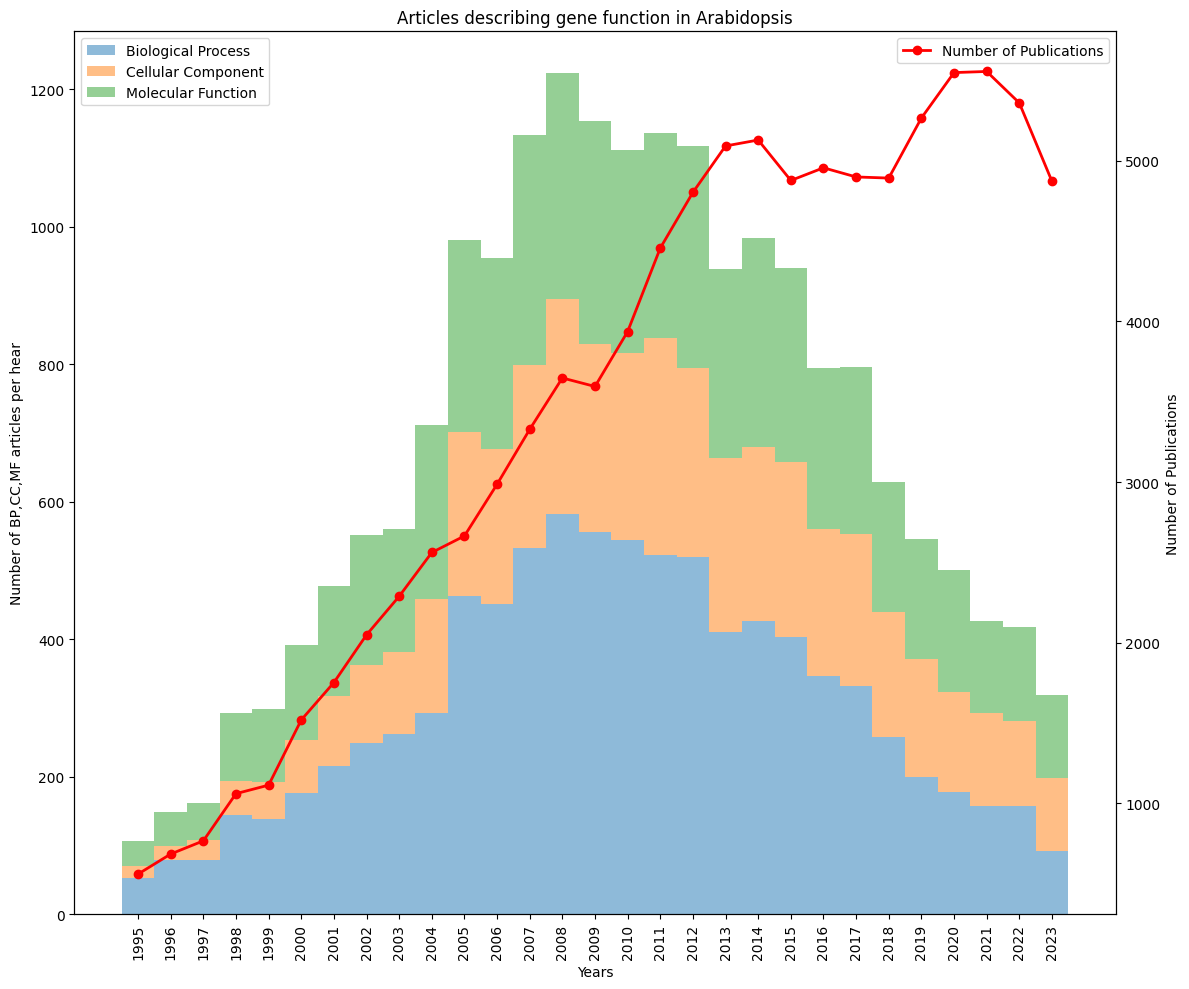

In [ ]:
import numpy as np  # Importing numpy for array operations and histogram calculations

# Reading the publication data from 'ncbi_data.txt', reversing the order of lines after skipping the first two header lines
a = open('ncbi_data.txt', 'r').readlines()[2:][::-1]

# Initialize lists to store the number of publications per year and the corresponding years
number_publications_year = []
years = []

# Loop through the reversed lines, extract the year and publication count from each line
for i in a[:-1]:
    splitta = i.rstrip().split(',')  # Split the line by commas
    year = int(splitta[0])           # Extract the year (first column)
    count = int(splitta[1])          # Extract the publication count (second column)
    years.append(year)               # Add year to the 'years' list
    number_publications_year.append(count)  # Add count to the 'number_publications_year' list

# Assuming 'publication_year_bp', 'publication_year_cc', and 'publication_year_mf' are already defined as lists of publication years
# These variables should contain publication years for Biological Process, Cellular Component, and Molecular Function
# Create histograms for each set (BP, CC, MF), with bins representing the years from 1995 to 2025
hist_set_a, bins = np.histogram(publication_year_bp, bins=np.arange(1995, 2025))
hist_set_b, _ = np.histogram(publication_year_cc, bins=bins)
hist_set_c, _ = np.histogram(publication_year_mf, bins=bins)

# Create the stacked histogram plot
bar_width = bins[1] - bins[0]

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot the stacked bar chart
ax1.bar(bins[:-1], hist_set_a, width=bar_width, label='Biological Process', alpha=0.5)
ax1.bar(bins[:-1], hist_set_b, width=bar_width, bottom=hist_set_a, label='Cellular Component', alpha=0.5)
ax1.bar(bins[:-1], hist_set_c, width=bar_width, bottom=hist_set_a + hist_set_b, label='Molecular Function', alpha=0.5)

# Set x-axis ticks to display every year
ax1.set_xticks(bins[:-1])
ax1.set_xticklabels(bins[:-1], rotation=90)

# Add labels and title for the histogram
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of BP,CC,MF articles per hear')
ax1.set_title('Articles describing gene function in Arabidopsis')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()
ax2.plot(years, number_publications_year, color='red', marker='o', linestyle='-', linewidth=2, label='Number of Publications')
ax2.set_ylabel('Number of Publications')
ax2.legend(loc='upper right')

# Save the figure as a PDF
plt.savefig('/content/publications_years.pdf')

# Display the plot
plt.tight_layout()
plt.show()

#Number of papers found with 'Arabidopsis thaliana' on NCBI

##Which contry are the papers from?

In [ ]:
import matplotlib.pyplot as plt
from Bio import Entrez

biological_process_year, cellular_component_year, molecular_function_year = [], [], []

Entrez.email = "your_email@example.com"

pubyear2country = {}
def get_publication_countries(pmid_list):
    print('received so many ids', len(set(pmid_list)))
    id_list = ','.join(pmid_list)
    handle = Entrez.efetch(db="pubmed", id=id_list, retmode="xml")
    records = Entrez.read(handle)

    for record in records['PubmedArticle']:
        try:
            pmid = record['PubmedData']['ArticleIdList'][0]

            countries = []
            splitta = str(record).replace(".'","!'").replace('."','!"').split()
            for i in splitta:
              if '@' in i:
                #print(i, i.split('.')[-1].split("'")[0].split("!")[0])
                countries+=[i.split('.')[-1].split("'")[0].split("!")[0]]
            if int(record['PubmedData']['History'][0]['Year']) not in pubyear2country:
              pubyear2country[int(record['PubmedData']['History'][0]['Year'])] = []
            pubyear2country[int(record['PubmedData']['History'][0]['Year'])] += countries
        except (KeyError, IndexError):
            pass

    return pubyear2country

# List of PubMed IDs
publication_year = get_publication_countries(list(set(biological_process_pubmedid+cellular_component_pubmedid+molecular_function_pubmedid)))

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np


url = 'https://data.iana.org/TLD/tlds-alpha-by-domain.txt'
response = requests.get(url)

# Check if request was successful
if response.status_code == 200:
    tlds = response.text.split('\n')
    cc_tlds = [tld.lower() for tld in tlds]
else:
    print("Failed to fetch the data")

allCountries = []
for year in publication_year:
  allCountries+=list(set(cc_tlds)&set(publication_year[year]))
allCountries = list(set(allCountries))

years = sorted(list(publication_year))

saveDic = {}
for year in years:
  for country in allCountries:
    if country not in saveDic:
      saveDic[country] = []
    saveDic[country] += [publication_year[year].count(country)]

for i in saveDic:
  saveDic[i] = '\t'.join(map(str, np.cumsum(saveDic[i])))

save = ['year\t'+'\t'.join(map(str, years))]

for i in saveDic:
  save.append(i+'\t'+saveDic[i]+'\n')

v = open('years2countries.txt','w')
v.writelines(save)
v.close()

#Which phylostrata are studied?

This uses a gene to phylostrata assignments from one of our phylostratigraphy papers (https://pubmed.ncbi.nlm.nih.gov/28161902/). The file is available at: https://github.com/mutwil/COPB2024/tree/main. Upload the file to your colab notebook at '/content/drive/MyDrive/' or modify the path to the file below.


In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


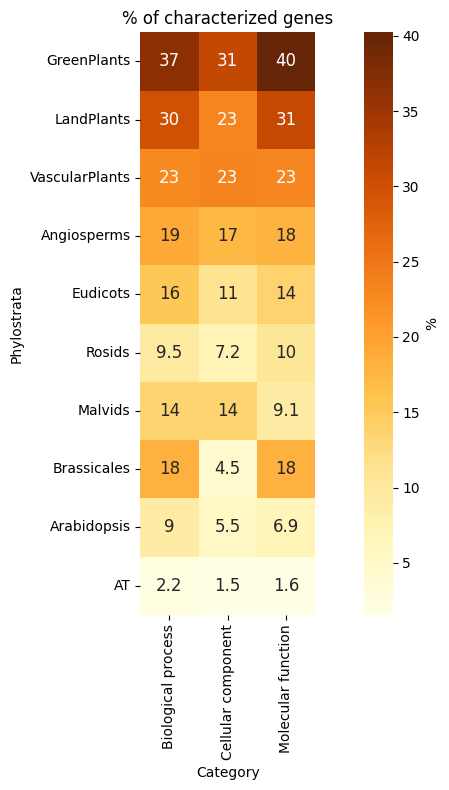

In [ ]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the 'gene2phylostrata.txt' file and processing the data
a = open('/content/drive/MyDrive/gene2phylostrata.txt', 'r').readlines()

# Create a dictionary mapping gene IDs to their respective phylostrata
gene2phylostrata = {}
for i in a[1:]:  # Skipping the header line
    splitta = i.rstrip().split('\t')  # Split by tab
    gene2phylostrata[splitta[0]] = splitta[2]  # Map gene ID to its phylostratum

# Create a reverse mapping: phylostrata to genes
phylostrata2gene = {}
for i in a:
    splitta = i.rstrip().split('\t')
    if splitta[2] not in phylostrata2gene:  # If phylostratum not in the dictionary, initialize a list
        phylostrata2gene[splitta[2]] = []
    phylostrata2gene[splitta[2]].append(splitta[0])  # Append gene ID to the corresponding phylostratum

# Remove the 'Phylostratum' header key from the dictionary as it is not needed
del phylostrata2gene['Phylostratum']

# Initialize dictionaries and lists to store results for each GO category
data = {'Biological process': {}, 'Cellular component': {}, 'Molecular function': []}
Category = []  # To store the category names (BP, CC, MF)
Phylostrata = []  # To store the phylostrata names
Value = []  # To store the overlap percentages

# Calculate overlap percentages for each phylostratum and GO category
for phylo in phylostrata2gene:
    # Biological Process (BP)
    overlap = len(set(phylostrata2gene[phylo]) & set(biological_process))  # Intersection of genes in the phylostratum and BP
    Category.append('Biological process')  # Append category name
    Phylostrata.append(phylo)  # Append phylostratum name
    Value.append(overlap / len(phylostrata2gene[phylo]) * 100)  # Calculate percentage of genes in BP

    # Cellular Component (CC)
    overlap = len(set(phylostrata2gene[phylo]) & set(cellular_component))  # Intersection of genes in CC
    Category.append('Cellular component')
    Phylostrata.append(phylo)
    Value.append(overlap / len(phylostrata2gene[phylo]) * 100)

    # Molecular Function (MF)
    overlap = len(set(phylostrata2gene[phylo]) & set(molecular_function))  # Intersection of genes in MF
    Category.append('Molecular function')
    Phylostrata.append(phylo)
    Value.append(overlap / len(phylostrata2gene[phylo]) * 100)

# Prepare the data for the heatmap
data = {}
data['Category'] = Category  # Assign the category list
data['Phylostrata'] = Phylostrata  # Assign the phylostrata list
data['%'] = Value  # Assign the calculated percentage values

# Convert the data into a pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Define the order of phylostrata for better visualization in the heatmap
order = ["GreenPlants", "LandPlants", "VascularPlants", "Angiosperms", "Eudicots", "Rosids", "Malvids", "Brassicales", "Arabidopsis", "AT"]

# Convert the 'Phylostrata' column into a categorical type based on the defined order
df["Phylostrata"] = pd.Categorical(df["Phylostrata"], categories=order, ordered=True)

# Sort the DataFrame based on the phylostrata order and reset the index
df = df.sort_values("Phylostrata").reset_index(drop=True)

# Pivot the DataFrame to prepare for the heatmap (rows: Phylostrata, columns: Category, values: %)
heatmap_data = df.pivot(index="Phylostrata", columns="Category", values="%")

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the plot
heatmap = sns.heatmap(heatmap_data, annot=True, cmap="YlOrBr", cbar_kws={'label': '%'}, square=True, annot_kws={"size": 12})
plt.title("% of Characterized Genes")  # Set the title of the heatmap
plt.xlabel("Category")  # Label for the x-axis
plt.ylabel("Phylostrata")  # Label for the y-axis
plt.tight_layout()  # Adjust layout to prevent overlap

# Save the heatmap as a PDF file
plt.savefig('phylostrata_GO.pdf')

# Display the heatmap
plt.show()

#Which phylostrata have PPI data - ie.. which are predictable?

In [ ]:
# Step 1: Download the BioGRID dataset
!wget 'https://downloads.thebiogrid.org/Download/BioGRID/Release-Archive/BIOGRID-4.4.236/BIOGRID-ALL-4.4.236.tab.zip'

# This command uses `wget` to download a compressed zip file containing the BioGRID dataset (version 4.4.236) from the specified URL.

# Step 2: Unzip the downloaded file
!unzip BIOGRID-ALL-4.4.236.tab.zip -d BIOGRID-ALL-4.4.236.tab

# This command extracts the contents of the downloaded zip file into a directory called 'BIOGRID-ALL-4.4.236.tab'.
# The `-d` flag specifies the directory where the contents will be extracted.

--2024-08-12 03:53:45--  https://downloads.thebiogrid.org/Download/BioGRID/Release-Archive/BIOGRID-4.4.236/BIOGRID-ALL-4.4.236.tab.zip
Resolving downloads.thebiogrid.org (downloads.thebiogrid.org)... 173.255.198.187
Connecting to downloads.thebiogrid.org (downloads.thebiogrid.org)|173.255.198.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/download]
Saving to: ‘BIOGRID-ALL-4.4.236.tab.zip’

BIOGRID-ALL-4.4.236     [      <=>           ]  61.07M  36.9MB/s    in 1.7s    

2024-08-12 03:53:48 (36.9 MB/s) - ‘BIOGRID-ALL-4.4.236.tab.zip’ saved [64036255]

Archive:  BIOGRID-ALL-4.4.236.tab.zip
  inflating: BIOGRID-ALL-4.4.236.tab/BIOGRID-ALL-4.4.236.tab.txt  


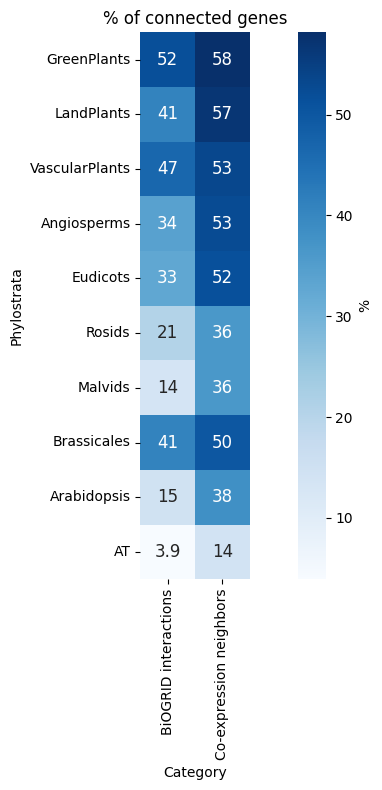

In [ ]:
import re  # Importing the regular expressions module

# Define a regular expression pattern to match Arabidopsis gene identifiers (e.g., "AT1G12345")
pattern = r'at\dg\d{5}'

# Reading the BioGRID interaction data, converting to lowercase, and splitting lines
a = open('/content/BIOGRID-ALL-4.4.236.tab/BIOGRID-ALL-4.4.236.tab.txt', 'r').read().lower().splitlines()[1:]

# Initialize a dictionary to store protein-protein interaction (PPI) genes from BioGRID
ppi_genes = {}
for i in a:
    splitta = i.rstrip().split('\t')  # Split each line by tabs
    # Check if both interacting partners match the gene pattern (Arabidopsis gene ID)
    if re.findall(pattern, splitta[0]) and re.findall(pattern, splitta[1]):
        # Add the interacting genes to the PPI network if they are not already present
        if splitta[0] not in ppi_genes:
            ppi_genes[splitta[0]] = []
        if splitta[1] not in ppi_genes:
            ppi_genes[splitta[1]] = []
        # Add each gene as an interaction partner of the other
        ppi_genes[splitta[0]].append(splitta[1])
        ppi_genes[splitta[1]].append(splitta[0])

#This is conekt Arabidopsis network which you can download from https://github.com/mutwil/COPB2024/blob/main/network_63.tab.zip
a= open('/content/drive/MyDrive/network_63.tab','r').read().lower().splitlines()[1:]

# Initialize a dictionary to store co-expression genes from the network file
coexp_genes = {}
for i in a:
    splitta = i.rstrip().split('\t')  # Split each line by tabs
    # Only consider interactions where the co-expression score is less than 11
    if int(splitta[2]) < 11:
        # Add the co-expressed genes to the network if they are not already present
        if splitta[0] not in coexp_genes:
            coexp_genes[splitta[0]] = []
        if splitta[1] not in coexp_genes:
            coexp_genes[splitta[1]] = []
        # Add each gene as a co-expression partner of the other
        coexp_genes[splitta[0]].append(splitta[1])
        coexp_genes[splitta[1]].append(splitta[0])

# Finding co-expression neighbors with experimentally characterized genes
coexp_neighbors = []
expgenes = set([x.lower() for x in biological_process + cellular_component + molecular_function])  # Set of experimentally verified genes
for gene in coexp_genes:
    # Check if any co-expression partner of the gene is experimentally characterized
    if len(set(coexp_genes[gene]) & expgenes) > 0:
        coexp_neighbors.append(gene)  # Add the gene to the list of co-expression neighbors

# Initialize lists for storing results
data = {'BiOGRID interactions': {}, 'Co-expression': {}}
Category = []
Phylostrata = []
Value = []

# Calculating the percentage of genes in each phylostratum that participate in BioGRID interactions
for phylo in phylostrata2gene:
    overlap = len(set(phylostrata2gene[phylo]) & set(ppi_genes))  # Intersection of genes in phylostratum and PPI genes
    Category.append('BiOGRID interactions')
    Phylostrata.append(phylo)
    Value.append(overlap / len(phylostrata2gene[phylo]) * 100)  # Calculate percentage of BioGRID interactions

# Calculating the percentage of genes in each phylostratum that are co-expression neighbors
for phylo in phylostrata2gene:
    overlap = len(set(phylostrata2gene[phylo]) & set(coexp_neighbors))  # Intersection of genes in phylostratum and co-expression neighbors
    Category.append('Co-expression neighbors')
    Phylostrata.append(phylo)
    Value.append(overlap / len(phylostrata2gene[phylo]) * 100)  # Calculate percentage of co-expression neighbors

# Prepare the data for visualization
data = {}
data['Category'] = Category  # Assign categories (BioGRID, Co-expression)
data['Phylostrata'] = Phylostrata  # Assign phylostrata
data['%'] = Value  # Assign percentages

# Convert the data into a pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Define the order of phylostrata for better visualization in the heatmap
order = ["GreenPlants", "LandPlants", "VascularPlants", "Angiosperms", "Eudicots", "Rosids", "Malvids", "Brassicales", "Arabidopsis", "AT"]

# Convert 'Phylostrata' to a categorical type based on the defined order
df["Phylostrata"] = pd.Categorical(df["Phylostrata"], categories=order, ordered=True)

# Sort the DataFrame by phylostrata order and reset the index
df = df.sort_values("Phylostrata").reset_index(drop=True)

# Pivot the DataFrame to create a format suitable for the heatmap (rows: Phylostrata, columns: Category, values: %)
heatmap_data = df.pivot(index="Phylostrata", columns="Category", values="%")

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the figure
heatmap = sns.heatmap(heatmap_data, annot=True, cmap="Blues", cbar_kws={'label': '%'}, square=True, annot_kws={"size": 12})
plt.title("% of Connected Genes")  # Set the title of the heatmap
plt.xlabel("Category")  # Set the label for the x-axis
plt.ylabel("Phylostrata")  # Set the label for the y-axis
plt.tight_layout()  # Adjust layout to avoid overlapping elements

# Save the heatmap as a PDF file
plt.savefig('phylostrata_networks.pdf')

# Display the heatmap
plt.show()

#Which gene and journals are most studied/published in?

In [ ]:
# Step 1: Install the Biopython library
# Biopython is a library for biological computation. You are installing it for working with biological data.
!pip install biopython

# Step 2: Download the Arabidopsis thaliana Gene Ontology (GO) and GO Slim annotations
# The file 'ATH_GO_GOSLIM.txt.gz' is downloaded from TAIR (The Arabidopsis Information Resource).
!wget -O ATH_GO_GOSLIM.txt.gz "https://www.arabidopsis.org/api/download-files/download?filePath=GO_and_PO_Annotations/Gene_Ontology_Annotations/ATH_GO_GOSLIM.txt.gz"

# Step 3: Download the gene aliases file
# The file 'gene_aliases_20220331.txt.gz' is downloaded from the TAIR data release section.
!wget -O gene_aliases_20220331.txt.gz "https://www.arabidopsis.org/api/download-files/download?filePath=Public_Data_Releases/TAIR_Data_20220331/gene_aliases_20220331.txt.gz"

# Step 4: Decompress the downloaded GO and gene alias files
# The 'gzip -d' command decompresses the gzipped files, resulting in the .txt files.
!gzip -d ATH_GO_GOSLIM.txt.gz

# Decompress the gene aliases file
!gzip -d gene_aliases_20220331.txt.gz

--2024-08-12 04:05:28--  https://www.arabidopsis.org/api/download-files/download?filePath=GO_and_PO_Annotations/Gene_Ontology_Annotations/ATH_GO_GOSLIM.txt.gz
Resolving www.arabidopsis.org (www.arabidopsis.org)... 15.197.242.219, 76.223.67.159
Connecting to www.arabidopsis.org (www.arabidopsis.org)|15.197.242.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘ATH_GO_GOSLIM.txt.gz’

ATH_GO_GOSLIM.txt.g     [  <=>               ]   7.08M  18.3MB/s    in 0.4s    

2024-08-12 04:05:30 (18.3 MB/s) - ‘ATH_GO_GOSLIM.txt.gz’ saved [7423496]

--2024-08-12 04:05:30--  https://www.arabidopsis.org/api/download-files/download?filePath=Public_Data_Releases/TAIR_Data_20220331/gene_aliases_20220331.txt.gz
Resolving www.arabidopsis.org (www.arabidopsis.org)... 15.197.242.219, 76.223.67.159
Connecting to www.arabidopsis.org (www.arabidopsis.org)|15.197.242.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspeci

In [ ]:
import chardet
from collections import Counter

# Step 1: Detect file encoding
# This opens the gene aliases file in binary mode and detects its encoding using chardet.
with open('gene_aliases_20220331.txt', 'rb') as f:
    rawdata = f.read()
    result = chardet.detect(rawdata)  # Detect the file encoding
    text = rawdata.decode(result['encoding'])  # Decode the file using the detected encoding

# Step 2: Extract gene synonyms and create a mapping between gene IDs and their synonyms
gene2synonyms = {}  # Initialize an empty dictionary to map gene IDs to their synonyms

# Iterate through each line of the file (after the header), and split each line into columns.
for i in text.splitlines()[1:]:  # Skip the header line
    splitta = i.rstrip().split('\t')  # Split each line by tab to get columns
    if len(splitta) > 1:  # Ensure there are more than 1 columns
        # If the gene ID (first column) is not already in the dictionary, initialize it
        if splitta[0] not in gene2synonyms:
            gene2synonyms[splitta[0]] = []
        # Add the gene synonym (second column) to the list of synonyms for the gene
        gene2synonyms[splitta[0]].append(splitta[1])

# Step 3: Find the most common synonym for each gene
for i in gene2synonyms:
    # Use the Counter to find the most common synonym for each gene
    counts = Counter(gene2synonyms[i])  # Count occurrences of each synonym
    # Update the dictionary with the most common synonym
    gene2synonyms[i] = counts.most_common(1)[0][0]

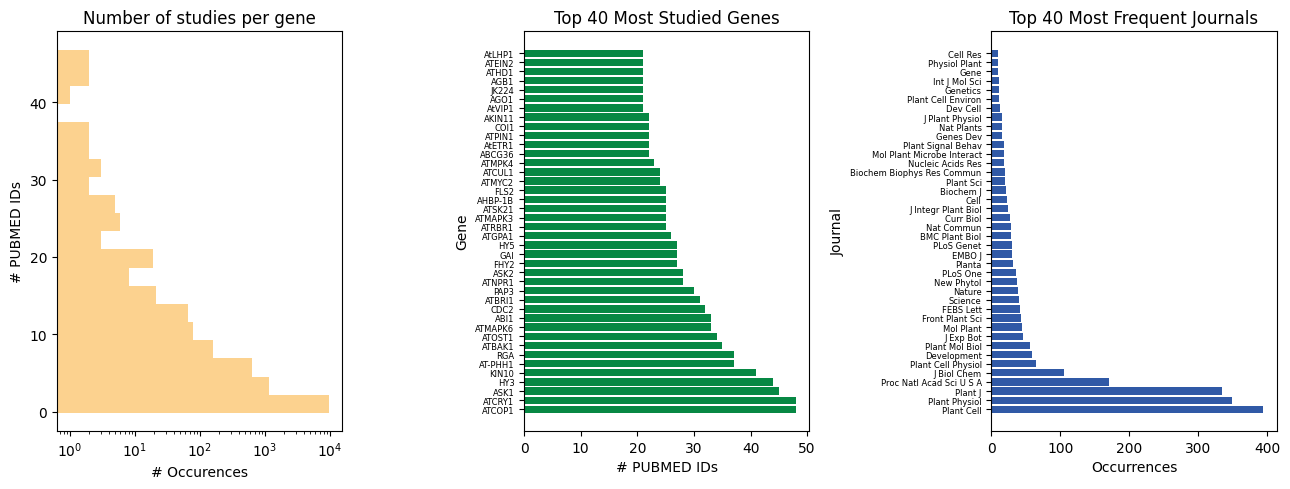

In [ ]:
from collections import Counter  # For counting occurrences of genes and journals
import matplotlib.pyplot as plt  # For plotting the results
from Bio import Entrez  # For fetching PubMed data using the Entrez API
import random  # For sampling random PubMed IDs

# Define how many top results to show (e.g., top 40 most studied genes and journals)
top_how_many = 40

# Set your email for Entrez API access (required by NCBI to avoid misuse of their service)
Entrez.email = "XXXX@XXX.XXX"

# Step 1: Extract genes with experimental evidence from the ATH_GO_GOSLIM.txt file
# Initialize dictionaries and lists to store gene-function mappings and PubMed IDs
gene2function = {}  # Dictionary to map genes to PubMed IDs (gene function data)
pubmedIDs = []  # List to collect all PubMed IDs linked to genes with experimental evidence

# Open the GO annotations file and process each line after the header
for i in open('/content/ATH_GO_GOSLIM.txt', 'r').readlines()[1:]:
    splitta = i.rstrip().split('\t')  # Split the line by tabs
    # If the gene is not already in the dictionary, initialize an empty list for it
    if splitta[0] not in gene2function:
        gene2function[splitta[0]] = []

    # Check if the line contains enough columns and the evidence code is experimental
    if len(splitta) > 10:
        if splitta[9] in ['IDA', 'IPI', 'EXP', 'IMP', 'IGI']:  # Only select experimental evidence codes
            if splitta[12].count(':') == 2:  # Ensure the PubMed ID is formatted correctly
                # Add the PubMed ID (from the 12th column) to the gene's list of PubMed IDs
                gene2function[splitta[0]] += [splitta[12].split(':')[2].strip()]
                # Collect all PubMed IDs for later journal analysis
                pubmedIDs += [splitta[12].split(':')[2].strip()]

# Step 2: Randomly sample all unique PubMed IDs to get the journals they were published in
papers = []
num_journals = len(set(pubmedIDs))  # Get the total number of unique PubMed IDs
sampled_list = list(random.sample(list(set(pubmedIDs)), num_journals))  # Randomly sample the list
papers = ','.join(sampled_list)  # Join the sampled PubMed IDs into a string for the API call

# Fetch article summaries from PubMed for the sampled PubMed IDs
handle = Entrez.esummary(db="pubmed", id=papers, retmode="xml")

# Parse the article summaries to extract the journal names
records = Entrez.parse(handle)
journal_names = []  # List to store journal names

# Attempt to parse the journal names; if there's an error, the program will continue
try:
    for record in records:
        journal_names += [record['Source']]  # Extract the journal name from the record
except:
    pass

# Step 3: Count the number of studies (PubMed IDs) per gene
study_count = []  # List to store the occurrence of studies for each gene

# For each gene, count how many PubMed IDs (studies) are linked to it
for gene in gene2function:
    gene2function[gene] = list(set(gene2function[gene]))  # Remove duplicates
    if len(gene2function[gene]) > 0:
        # Use the synonym for the gene if available, otherwise use the gene ID itself
        if gene in gene2synonyms:
            study_count += [gene2synonyms[gene]] * len(gene2function[gene])
        else:
            study_count += [gene] * len(gene2function[gene])

# Create a Counter object to count the occurrences of studies per gene and per journal
study_count = Counter(study_count)
journal_count = Counter(journal_names)

# Step 4: Extract the top X most studied genes and journals
top_studied = dict(study_count.most_common(top_how_many))  # Top X most studied genes
top_journals = dict(journal_count.most_common(top_how_many))  # Top X most frequent journals

# Step 5: Create visualizations to display the results

# Prepare data for the histogram of studies per gene
values = list(study_count.values())
hist_set_a, bins = np.histogram(values, bins=20)  # Create a histogram with 20 bins

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 5))

# Define colors for the bars
fst = '#FAA621'  # Light orange for the first plot
snd = '#078844'  # Green for the second plot
thd = '#3059A6'  # Blue for the third plot

# Step 6: Plot the histogram (Number of studies per gene)
bar_width = bins[1] - bins[0]  # Width of each bin
ax1.barh(bins[:-1], hist_set_a, height=bar_width, alpha=0.5, color=fst)  # Horizontal bar plot
ax1.set_ylabel('# PUBMED IDs')  # Y-axis label
ax1.set_xlabel('# Occurrences')  # X-axis label
ax1.set_title('Number of studies per gene')  # Title for the plot
ax1.set_xscale('log')  # Use logarithmic scale for the x-axis

# Step 7: Plot the top X most studied genes
ax2.barh(list(top_studied.keys()), list(top_studied.values()), color=snd)  # Horizontal bar plot
ax2.set_ylabel('Gene')  # Y-axis label
ax2.set_xlabel('# PUBMED IDs')  # X-axis label
ax2.set_title('Top %s Most Studied Genes' % top_how_many)  # Title for the plot

# Step 8: Plot the top X most frequent journals
ax3.barh(list(top_journals.keys()), list(top_journals.values()), color=thd)  # Horizontal bar plot
ax3.set_ylabel('Journal')  # Y-axis label
ax3.set_xlabel('Occurrences')  # X-axis label
ax3.set_title('Top %s Most Frequent Journals' % top_how_many)  # Title for the plot

# Adjust font size for the y-axis labels to fit all the gene and journal names
ax2.set_yticks(range(len(top_studied.keys())))
ax2.set_yticklabels(top_studied.keys(), fontsize=6)

ax3.set_yticks(range(len(top_journals.keys())))
ax3.set_yticklabels(top_journals.keys(), fontsize=6)

# Adjust the layout to prevent overlap between the plots
plt.tight_layout()

# Save the figure as a PNG file with high resolution (600 dpi)
plt.savefig('gene_journal_stats.png', dpi=600)

# Display the plot on the screen
plt.show()